## CLUENER 细粒度命名实体识别
https://github.com/CLUEbenchmark/CLUENER2020

### 1. 标签类别定义 & 标注规则：

- 地址（address）: **省**市**区**街**号，**路，**街道，**村等（如单独出现也标记）。地址是标记尽量完全的, 标记到最细。   
- 书名（book）: 小说，杂志，习题集，教科书，教辅，地图册，食谱，书店里能买到的一类书籍，包含电子书。   
- 公司（company）: **公司，**集团，**银行（央行，中国人民银行除外，二者属于政府机构）, 如：新东方，包含新华网/中国军网等。   
- 游戏（game）: 常见的游戏，注意有一些从小说，电视剧改编的游戏，要分析具体场景到底是不是游戏。    
- 政府（government）: 包括中央行政机关和地方行政机关两级。 中央行政机关有国务院、国务院组成部门（包括各部、委员会、中国人民银行和审计署）、国务院直属机构（如海关、税务、工商、环保总局等），军队等。   
- 电影（movie）: 电影，也包括拍的一些在电影院上映的纪录片，如果是根据书名改编成电影，要根据场景上下文着重区分下是电影名字还是书名。    
- 姓名（name）: 一般指人名，也包括小说里面的人物，宋江，武松，郭靖，小说里面的人物绰号：及时雨，花和尚，著名人物的别称，通过这个别称能对应到某个具体人物。   
- 组织机构（organization）: 篮球队，足球队，乐团，社团等，另外包含小说里面的帮派如：少林寺，丐帮，铁掌帮，武当，峨眉等。   
- 职位（position）: 古时候的职称：巡抚，知州，国师等。现代的总经理，记者，总裁，艺术家，收藏家等。   
- 景点（scene）: 常见旅游景点如：长沙公园，深圳动物园，海洋馆，植物园，黄河，长江等。   

In [4]:
!ls ./clue

test.json  train.json


In [6]:
import json

import util

import warnings
warnings.filterwarnings('ignore')

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/96/0jnny1gj02j8pgfvb9by368m0000gn/T/jieba.cache
Loading model cost 0.583 seconds.
Prefix dict has been built successfully.


In [7]:
train_path = './clue/train.json'
test_path = './clue/test.json'

train_samples = util.read_json(train_path)
test_samples = util.read_json(test_path)

print(f'训练集大小:\t{len(train_samples)}')
print(f'测试集大小:\t{len(test_samples)}')

训练集大小:	10748
测试集大小:	1343


In [8]:
test_samples[0]

{'text': '彭小军认为，国内银行现在走的是台湾的发卡模式，先通过跑马圈地再在圈的地里面选择客户，',
 'label': {'address': {'台湾': [[15, 16]]}, 'name': {'彭小军': [[0, 2]]}}}

### 2. 标签数据分布
按照不同标签类别统计
（注：一条数据中出现的所有实体都进行标注，如果一条数据出现两个地址（address）实体，
那么统计地址（address）类别数据的时候，算两条数据）

In [9]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict



In [36]:
# 分别获取每个标签出现的次数
def get_tag_count(samples):
    tag_count = defaultdict(int)
    for sample in samples:
        label = sample['label']
        for tag, tag_list in label.items():
            tag_count[tag] += len(tag_list)
    return tag_count


train_tag_count = get_tag_count(train_samples)
test_tag_count = get_tag_count(test_samples)

len(train_tag_count), len(test_tag_count)

(10, 10)

In [37]:
# 打印直方图
def plot_histogram(x, y):
    plt.subplots(figsize=(16, 9))
    g = sns.barplot(x, y)
    for index in range(len(x)): 
        g.text(index, y[index] + 10, y[index], color='black', ha="center") 

【训练集】标签数据分布如下：
address: 2829
book: 1131
company: 2897
game: 2325
government: 1797
movie: 1109
name: 3661
organization: 3075
position: 3052
scene: 1462


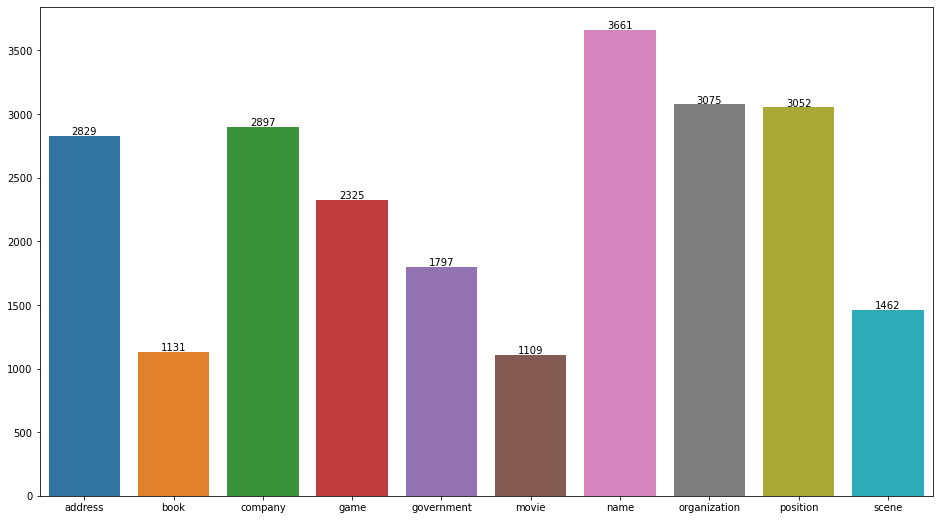

In [11]:
print("【训练集】标签数据分布如下：")
train_tag_count_items = sorted(
    train_tag_count.items(), key=lambda x: x[0]
)
for (k, v) in train_tag_count_items:
    print(f'{k}: {v}')
    
x = [x[0] for x in train_tag_count_items]
y = [x[1] for x in train_tag_count_items]
    
plot_histogram(x, y)

In [38]:
# 训练数据标签分布饼图
plt.figure(figsize=[9,7])
plt.pie(y, labels=x, autopct='%1.2f%%');

NameError: name 'x' is not defined

<Figure size 648x504 with 0 Axes>

【测试集】标签数据分布如下：
address: 364
book: 152
company: 366
game: 287
government: 244
movie: 150
name: 451
organization: 344
position: 425
scene: 199


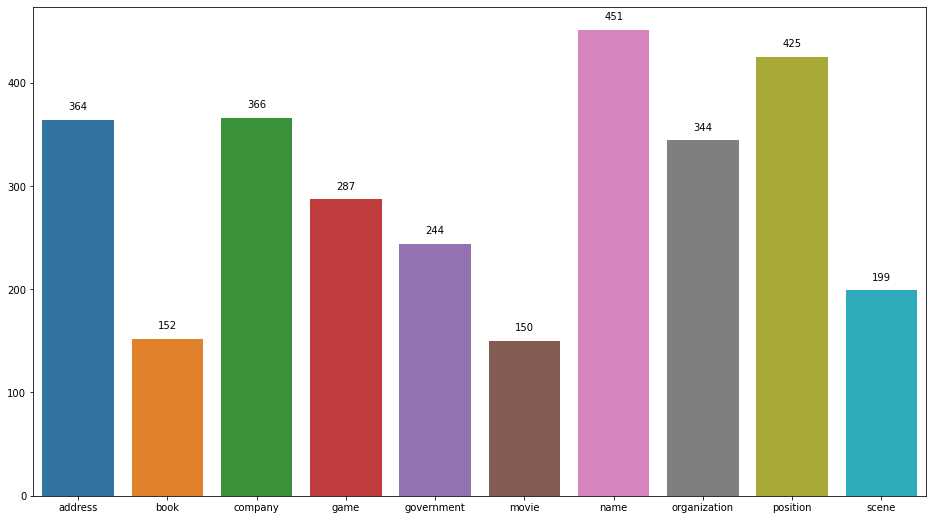

In [13]:
print("【测试集】标签数据分布如下：")
test_tag_count_items = sorted(
    test_tag_count.items(), key=lambda x: x[0]
)
for (k, v) in test_tag_count_items:
    print(f'{k}: {v}')
    
x = [x[0] for x in test_tag_count_items]
y = [x[1] for x in test_tag_count_items]
    
plot_histogram(x, y)

In [39]:
# 测试数据分布饼图
plt.figure(figsize=[9,7])
plt.pie(y, labels=x, autopct='%1.2f%%');

NameError: name 'x' is not defined

<Figure size 648x504 with 0 Axes>

#### 结论
1. 标签分布不均衡，测试集中name最高为15.69%，最低movie为4.75%。  
2. 训练集与测试集标签分布大体一致。

### 3. 文本长度

In [15]:
train_texts = [sample['text'] for sample in train_samples]
test_texts = [sample['text'] for sample in test_samples]
len(train_texts), len(test_texts)

(10748, 1343)

In [16]:
train_text_lengths = [len(text) for text in train_texts]
test_text_lengths = [len(text) for text in test_texts]

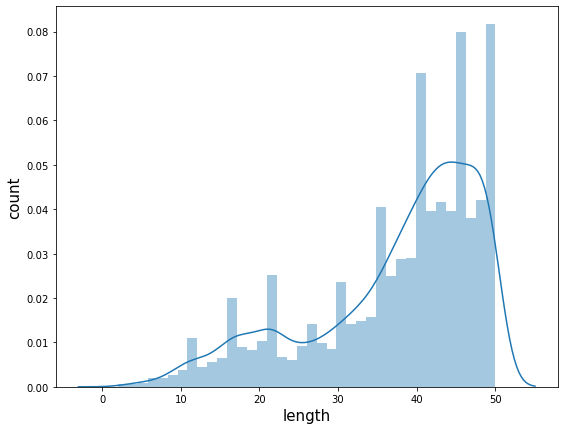

In [17]:
# 训练集文本长度分布
plt.figure(figsize=[9,7])
sns.distplot(train_text_lengths)
plt.xlabel('length', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

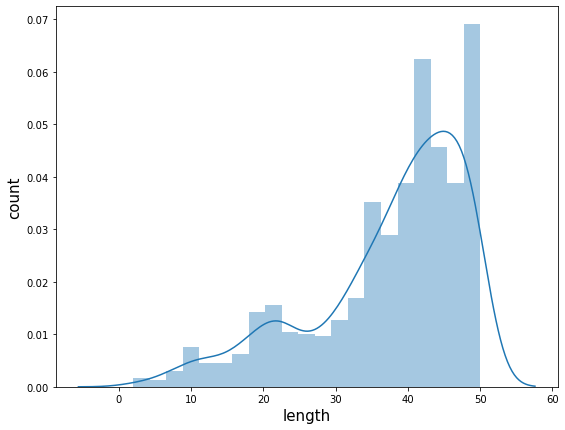

In [18]:
# 测试集文本长度分布
plt.figure(figsize=[9,7])
sns.distplot(test_text_lengths)
plt.xlabel('length', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

### 结论：
1. 所有文本长度均小于50
2. 训练集与测试集文本长度分布保持一致

### 4. 高频内容
统计每个标签内容的topN，查看标签的高频内容

In [19]:
from collections import defaultdict, Counter

tag_list = defaultdict(list)

# 记录训练集每个标签下的所有实体词
for sample in train_samples:
    label = sample['label']
    for tag, tag_detail in label.items():
        tag_list[tag].extend(
            [x.lower() for x in tag_detail.keys()]
        )

# 对每个标签内的实体词进行词频统计，统计出最频繁的100个
tag_tops = defaultdict(list)
for k, v in tag_list.items():
    c = Counter(v)
    for x in c.most_common(100):
        tag_tops[k].append(x[0])

In [20]:
# 使用pandas df展示结果
tag_df = pd.DataFrame(tag_tops)
tag_df.head(10)

,name,company,game,organization,movie,address,position,government,scene,book
0,姜山,招行,dota,英超,《海角七号》,北京,记者,央行,博物馆,大众软件
1,金石开,工行,war3,曼联,《画皮》,香港,专家,美军,巴厘岛,《大众软件》
2,金庸,建行,dota2,意甲,《查理的战争》,上海,主持人,银监会,海渔广场,《电脑游戏攻略》
3,陆慧明,招商银行,星际2,罗马,《生化危机4》,深圳,艺术家,海军,洱海,《gameinformer》
4,于海,立博,魔兽,联盟杯,《保持通话》,台湾,导演,德军,林达海渔广场,《红楼梦》
5,詹俊,暴雪,星际争霸2,阿森纳,《魔法奇缘》,广州,总经理,空军,盖蒂博物馆,《艺术与投资》
6,曹鹏飞,博彩公司,魔兽争霸3,切尔西,《赎罪》,美国,主任,俄军,鸟巢,《每日经济新闻》
7,盖蒂,花旗,cs,欧冠,《纳尼亚传奇2》,纽约,学生,美国政府,美术馆,理财周报
8,infi,bet365,imba,利物浦,变形金刚,金融街,负责人,财政部,长滩岛,每经
9,黄胄,交行,魔兽3,拉齐奥,《夺宝奇兵4》,丽泽商务区,选手,美国陆军,泸沽湖,晨报
